In [29]:
# 필요 모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### (1) 데이터 가져오기

In [30]:
# sklearn의 내장 데이터 활용
from sklearn.datasets import load_diabetes

diabetes=load_diabetes(as_frame=True)

In [31]:
# 입력 데이터와 target 데이터 데이터프레임 형태로 정의
df_x = diabetes.data
df_y = diabetes.target

In [32]:
print(df_x.shape)
print(df_y.shape)

(442, 10)
(442,)


In [33]:
# feature, values 확인
df_x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


### (2)(3) 모델에 입력할 데이터 X, y 준비하기

In [34]:
# dataframe to ndarray
X = df_x.values
y = df_y.values

### (4) train 데이터와 test 데이터로 분리하기

In [35]:
# train dataset, test dataset 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)    # default: 25%

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(331, 10) (331,)
(111, 10) (111,)


### (5) 모델 준비하기

In [36]:
# 랜덤하게 W, b 초기화
W = np.random.rand(X_train.shape[1])    # feature 개수만큼 있어야 함
b = np.random.rand()    # 1개

In [37]:
# 선형 회귀 모델
def model(X, W, b):
    predictions = 0
    for i in range(X_train.shape[1]):    # 가중치 개수만큼 반복되어야 함
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions    # 현재의 W, b 값을 바탕으로 예측값 산출

### (6) 손실함수 loss 정의하기

In [38]:
# MSE: 오차 제곱의 평균
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [39]:
# 예측값과 실제 정답 간의 loss
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

### (7) 기울기를 구하는 gradient 함수 구현하기

In [40]:
# 미분 공식을 바탕으로 gradient 함수 정의
def gradient(X, W, b, y):
    N = len(y)
    
    y_pred = model(X, W, b)
    
    # loss function을 각각 W와 b로 편미분
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

### (8) 하이퍼 파라미터인 학습률 설정하기

In [41]:
# 학습률: 0.0001, 0.01
LEARNING_RATE = [0.0001, 0.01]

### (9) 모델 학습하기

In [42]:
losses = []

# epoch: 1001, 10001
EPOCH = [1001, 10001, 30001]

# 총 여섯 가지 조합의 학습률과 에포크로 학습
for lr in LEARNING_RATE:
    for epoch in EPOCH:
        print("====================================")
        print(f"학습률: {lr}, 총 epoch: {epoch}")
        W_train = W
        b_train = b
        for i in range(1, epoch):
            dW, db = gradient(X_train, W_train, b_train, y_train)
            W_train -= lr * dW
            b_train -= lr * db
            L = loss(X_train, W_train, b_train, y_train)
            if i % 100 == 0:
                print('Iteration %d : Loss %0.4f' % (i, L))
        losses.append(L)

학습률: 0.0001, 총 epoch: 1001
Iteration 100 : Loss 28173.0236
Iteration 200 : Loss 27302.2139
Iteration 300 : Loss 26465.5226
Iteration 400 : Loss 25661.6120
Iteration 500 : Loss 24889.1964
Iteration 600 : Loss 24147.0409
Iteration 700 : Loss 23433.9587
Iteration 800 : Loss 22748.8098
Iteration 900 : Loss 22090.4989
Iteration 1000 : Loss 21457.9733
학습률: 0.0001, 총 epoch: 10001
Iteration 100 : Loss 28165.1096
Iteration 200 : Loss 27294.3075
Iteration 300 : Loss 26457.6237
Iteration 400 : Loss 25653.7203
Iteration 500 : Loss 24881.3119
Iteration 600 : Loss 24139.1632
Iteration 700 : Loss 23426.0878
Iteration 800 : Loss 22740.9455
Iteration 900 : Loss 22082.6409
Iteration 1000 : Loss 21450.1216
Iteration 1100 : Loss 20842.3765
Iteration 1200 : Loss 20258.4340
Iteration 1300 : Loss 19697.3607
Iteration 1400 : Loss 19158.2598
Iteration 1500 : Loss 18640.2697
Iteration 1600 : Loss 18142.5626
Iteration 1700 : Loss 17664.3430
Iteration 1800 : Loss 17204.8467
Iteration 1900 : Loss 16763.3396
Iterat

Iteration 16200 : Loss 5820.1149
Iteration 16300 : Loss 5818.0134
Iteration 16400 : Loss 5815.9665
Iteration 16500 : Loss 5813.9722
Iteration 16600 : Loss 5812.0283
Iteration 16700 : Loss 5810.1330
Iteration 16800 : Loss 5808.2842
Iteration 16900 : Loss 5806.4802
Iteration 17000 : Loss 5804.7193
Iteration 17100 : Loss 5802.9997
Iteration 17200 : Loss 5801.3198
Iteration 17300 : Loss 5799.6782
Iteration 17400 : Loss 5798.0732
Iteration 17500 : Loss 5796.5036
Iteration 17600 : Loss 5794.9678
Iteration 17700 : Loss 5793.4646
Iteration 17800 : Loss 5791.9927
Iteration 17900 : Loss 5790.5509
Iteration 18000 : Loss 5789.1381
Iteration 18100 : Loss 5787.7530
Iteration 18200 : Loss 5786.3946
Iteration 18300 : Loss 5785.0620
Iteration 18400 : Loss 5783.7540
Iteration 18500 : Loss 5782.4697
Iteration 18600 : Loss 5781.2082
Iteration 18700 : Loss 5779.9686
Iteration 18800 : Loss 5778.7501
Iteration 18900 : Loss 5777.5518
Iteration 19000 : Loss 5776.3730
Iteration 19100 : Loss 5775.2128
Iteration 

Iteration 900 : Loss 3368.1204
Iteration 1000 : Loss 3364.2407
Iteration 1100 : Loss 3360.4197
Iteration 1200 : Loss 3356.6561
Iteration 1300 : Loss 3352.9485
Iteration 1400 : Loss 3349.2957
Iteration 1500 : Loss 3345.6965
Iteration 1600 : Loss 3342.1496
Iteration 1700 : Loss 3338.6540
Iteration 1800 : Loss 3335.2085
Iteration 1900 : Loss 3331.8120
Iteration 2000 : Loss 3328.4635
Iteration 2100 : Loss 3325.1620
Iteration 2200 : Loss 3321.9064
Iteration 2300 : Loss 3318.6958
Iteration 2400 : Loss 3315.5293
Iteration 2500 : Loss 3312.4059
Iteration 2600 : Loss 3309.3247
Iteration 2700 : Loss 3306.2850
Iteration 2800 : Loss 3303.2858
Iteration 2900 : Loss 3300.3264
Iteration 3000 : Loss 3297.4059
Iteration 3100 : Loss 3294.5236
Iteration 3200 : Loss 3291.6787
Iteration 3300 : Loss 3288.8705
Iteration 3400 : Loss 3286.0983
Iteration 3500 : Loss 3283.3614
Iteration 3600 : Loss 3280.6591
Iteration 3700 : Loss 3277.9909
Iteration 3800 : Loss 3275.3559
Iteration 3900 : Loss 3272.7537
Iteration

Iteration 27100 : Loss 3041.5952
Iteration 27200 : Loss 3041.2911
Iteration 27300 : Loss 3040.9893
Iteration 27400 : Loss 3040.6900
Iteration 27500 : Loss 3040.3931
Iteration 27600 : Loss 3040.0985
Iteration 27700 : Loss 3039.8063
Iteration 27800 : Loss 3039.5164
Iteration 27900 : Loss 3039.2288
Iteration 28000 : Loss 3038.9435
Iteration 28100 : Loss 3038.6605
Iteration 28200 : Loss 3038.3797
Iteration 28300 : Loss 3038.1011
Iteration 28400 : Loss 3037.8248
Iteration 28500 : Loss 3037.5506
Iteration 28600 : Loss 3037.2786
Iteration 28700 : Loss 3037.0088
Iteration 28800 : Loss 3036.7411
Iteration 28900 : Loss 3036.4755
Iteration 29000 : Loss 3036.2120
Iteration 29100 : Loss 3035.9506
Iteration 29200 : Loss 3035.6912
Iteration 29300 : Loss 3035.4339
Iteration 29400 : Loss 3035.1786
Iteration 29500 : Loss 3034.9253
Iteration 29600 : Loss 3034.6740
Iteration 29700 : Loss 3034.4247
Iteration 29800 : Loss 3034.1774
Iteration 29900 : Loss 3033.9319
Iteration 30000 : Loss 3033.6884


In [43]:
print(losses)

[21457.973336389095, 6326.192461138382, 5688.486686313191, 5101.542429363352, 3406.0678408181425, 3033.688448713556]


Iteration 100 : Loss 3438.1729
Iteration 200 : Loss 3040.3111
Iteration 300 : Loss 3033.0807
Iteration 400 : Loss 3032.7220
Iteration 500 : Loss 3032.4861
Iteration 600 : Loss 3032.2541
Iteration 700 : Loss 3032.0239
Iteration 800 : Loss 3031.7955
Iteration 900 : Loss 3031.5689
Iteration 1000 : Loss 3031.3441
Iteration 1100 : Loss 3031.1210
Iteration 1200 : Loss 3030.8996
Iteration 1300 : Loss 3030.6800
Iteration 1400 : Loss 3030.4620
Iteration 1500 : Loss 3030.2458
Iteration 1600 : Loss 3030.0312
Iteration 1700 : Loss 3029.8183
Iteration 1800 : Loss 3029.6070
Iteration 1900 : Loss 3029.3974
Iteration 2000 : Loss 3029.1893
Iteration 2100 : Loss 3028.9829
Iteration 2200 : Loss 3028.7781
Iteration 2300 : Loss 3028.5748
Iteration 2400 : Loss 3028.3731
Iteration 2500 : Loss 3028.1730
Iteration 2600 : Loss 3027.9744
Iteration 2700 : Loss 3027.7773
Iteration 2800 : Loss 3027.5817
Iteration 2900 : Loss 3027.3877
Iteration 3000 : Loss 3027.1951
Iteration 3100 : Loss 3027.0040
Iteration 3200 : 

Iteration 27900 : Loss 3005.1670
Iteration 28000 : Loss 3005.1334
Iteration 28100 : Loss 3005.1000
Iteration 28200 : Loss 3005.0668
Iteration 28300 : Loss 3005.0339
Iteration 28400 : Loss 3005.0011
Iteration 28500 : Loss 3004.9685
Iteration 28600 : Loss 3004.9362
Iteration 28700 : Loss 3004.9040
Iteration 28800 : Loss 3004.8721
Iteration 28900 : Loss 3004.8403
Iteration 29000 : Loss 3004.8087
Iteration 29100 : Loss 3004.7774
Iteration 29200 : Loss 3004.7462
Iteration 29300 : Loss 3004.7152
Iteration 29400 : Loss 3004.6845
Iteration 29500 : Loss 3004.6539
Iteration 29600 : Loss 3004.6235
Iteration 29700 : Loss 3004.5932
Iteration 29800 : Loss 3004.5632
Iteration 29900 : Loss 3004.5334
Iteration 30000 : Loss 3004.5037


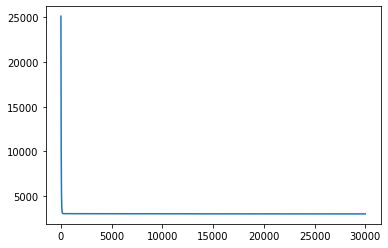

In [44]:
# 최종 모델 학습 
# 학습률 0.01, epoch 30001일 때 loss가 가장 작음
LEARNING_RATE = 0.01
losses = []

for i in range(1, 30001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

plt.plot(losses)
plt.show()

### (10) test 데이터에 대한 성능 확인하기

In [45]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2593.530763557358

### (11) 정답 데이터와 예측한 데이터 시각화하기

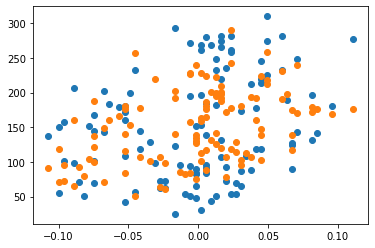

In [46]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()